In [1]:
%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


- EPS
- Net Margin (%)
- Dvd. Yield (%)
- ROE (%)

In [2]:
from bs4 import BeautifulSoup
import requests

url = "https://marketdata.set.or.th/mkt/sectorquotation.do?sector=SET50&language=en&country=US"
page = requests.get(url)
data = page.content
soup = BeautifulSoup(data)
SET50 = {}

for i,link in enumerate(soup.find_all('td', style="text-align: left;")):
    for sublink in link.find_all('a'):
        html = sublink.get('href')
        if html[:14] == "stockquotation":
            name = html.split("stockquotation.do?symbol=")[1].split("&sso")[0]
            SET50[name] = {}
            SET50[name]["PE"] = {}
            SET50[name]["EPS"] = {}
            SET50[name]["ProfitMargin"] = {}
            SET50[name]["ROE"] = {}
            SET50[name]["Dividend_Yield"]= {}
        else:
            pass

//anaconda/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file //anaconda/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [3]:
def ProCut(s):
    check = False
    ans = []
    s1 = ""
    for i in s:
        if i == ">":
            check = True
            s1 = ""
        elif i == "&" and s1 != "" and s1 != "&nbsp;":
            ans.append(s1)
            s1 = ""
            check = False
        elif check:
            s1 += i
        else:
            continue
    return ans

In [4]:
def getPE(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+stockname+"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">P/E</td>''')
    PE = data[test+50:test+250]
    return ProCut(PE)
    
def getEPS(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+stockname+"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">EPS (Baht)</td>''')
    EPS = data[test+50:test+200]
    return ProCut(EPS)

def getNPM(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+stockname+"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">Net Profit Margin(%)</td>''')
    NPM = data[test+50:test+200]
    return ProCut(NPM)

def getROE(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+ stockname +"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">ROE(%)</td>''')
    NPM = data[test+50:test+200]
    return ProCut(NPM)

def getDVD(stockname):
    url = "https://www.set.or.th/set/companyhighlight.do?symbol="+ stockname +"&ssoPageId=5&language=en&country=US"
    page = requests.get(url)
    data = page.content
    soup = BeautifulSoup(data)
    test = data.find('''<td style="text-align:left;" height="15">Dvd. Yield(%)</td>''')
    NPM = data[test+50:test+250]
    return ProCut(NPM)




In [5]:
for index,a in enumerate(SET50):
    if index%10 == 0:
        print 'preparing your stock:',index
    FullPE = getPE(a)
    FullEPS = getEPS(a)
    FullNPM = getNPM(a)
    FullROE = getROE(a)
    FullDVD = getDVD(a)
    year = ["2016","2015","2014","2013"]
    for i in range(len(FullEPS)):
        SET50[a]["Dividend_Yield"][year[i]] = FullDVD[(-i-1)]
    for i in range(len(FullEPS)):
        SET50[a]["PE"][year[i]] = FullPE[(-i-1)]
    for i in range(len(FullEPS)):
        SET50[a]["EPS"][year[i]] = FullEPS[(-i-1)]
    for i in range(len(FullNPM)):
        SET50[a]["ProfitMargin"][year[i]] = FullNPM[(-i-1)]
    for i in range(len(FullNPM)):
        SET50[a]["ROE"][year[i]] = FullROE[(-i-1)]

preparing your stock: 0
preparing your stock: 10
preparing your stock: 20
preparing your stock: 30
preparing your stock: 40


In [6]:
StockComponent = {}
check = []
filterYear = []
count = 0

for i in SET50:
    try:
#         print 'Stock:',i
        StockDf = pd.DataFrame(SET50[i])
        if len(StockDf.index) < 4:
            filterYear.append(i)
#         print StockDf
    except:
        check.append(i)
#     print '==================================='
    
for i in filterYear:
    SET50.pop(i)

In [7]:
setDf = pd.DataFrame(SET50)
setDf

,ADVANC,AOT,BANPU,BBL,BCP,BDMS,BH,BLA,BTS,CENTEL,...,SCB,SCC,TCAP,THAI,TMB,TOP,TPIPL,TRUE,TU,WHA
Dividend_Yield,"{u'2015': u'8.84', u'2014': u'7.89', u'2016': ...","{u'2015': u'1.72', u'2014': u'1.89', u'2016': ...","{u'2015': u'2.72', u'2014': u'7.50', u'2016': ...","{u'2015': u'4.08', u'2014': u'4.26', u'2016': ...","{u'2015': u'5.97', u'2014': u'3.03', u'2016': ...","{u'2015': u'1.13', u'2014': u'1.03', u'2016': ...","{u'2015': u'1.30', u'2014': u'0.92', u'2016': ...","{u'2015': u'1.21', u'2014': u'0.89', u'2016': ...","{u'2015': u'7.95', u'2014': u'6.59', u'2016': ...","{u'2015': u'1.26', u'2014': u'0.91', u'2016': ...",...,"{u'2015': u'3.61', u'2014': u'5.02', u'2016': ...","{u'2015': u'3.23', u'2014': u'2.72', u'2016': ...","{u'2015': u'4.09', u'2014': u'4.54', u'2016': ...","{u'2015': u'N/A', u'2014': u'N/A', u'2016': u'...","{u'2015': u'2.85', u'2014': u'2.48', u'2016': ...","{u'2015': u'3.74', u'2014': u'1.76', u'2016': ...","{u'2015': u'0.81', u'2014': u'0.95', u'2016': ...","{u'2015': u'0.07', u'2014': u'N/A', u'2016': u...","{u'2015': u'3.00', u'2014': u'3.13', u'2016': ...","{u'2015': u'N/A', u'2014': u'N/A', u'2016': u'..."
EPS,"{u'2015': u'13.17', u'2014': u'12.12', u'2016'...","{u'2015': u'13.11', u'2014': u'8.55', u'2016':...","{u'2015': u'-0.59', u'2014': u'1.04', u'2016':...","{u'2015': u'17.91', u'2014': u'19.03', u'2016'...","{u'2015': u'3.01', u'2014': u'0.52', u'2016': ...","{u'2015': u'0.51', u'2014': u'0.48', u'2016': ...","{u'2015': u'4.72', u'2014': u'3.75', u'2016': ...","{u'2015': u'2.41', u'2014': u'1.57', u'2016': ...","{u'2015': u'0.25', u'2014': u'1.08', u'2016': ...","{u'2015': u'1.24', u'2014': u'0.88', u'2016': ...",...,"{u'2015': u'13.88', u'2014': u'15.69', u'2016'...","{u'2015': u'37.83', u'2014': u'28.01', u'2016'...","{u'2015': u'4.61', u'2014': u'4.24', u'2016': ...","{u'2015': u'-5.99', u'2014': u'-7.15', u'2016'...","{u'2015': u'0.21', u'2014': u'0.22', u'2016': ...","{u'2015': u'5.97', u'2014': u'-1.97', u'2016':...","{u'2015': u'0.02', u'2014': u'0.07', u'2016': ...","{u'2015': u'0.18', u'2014': u'0.07', u'2016': ...","{u'2015': u'1.11', u'2014': u'1.10', u'2016': ...","{u'2015': u'0.16', u'2014': u'1.02', u'2016': ..."
PE,"{u'2015': u'12.49', u'2014': u'12.06', u'2016'...","{u'2015': u'29.05', u'2014': u'26.39', u'2016'...","{u'2015': u'N/A', u'2014': u'4,980.12', u'2016...","{u'2015': u'9.75', u'2014': u'8.26', u'2016': ...","{u'2015': u'13.07', u'2014': u'25.62', u'2016'...","{u'2015': u'42.30', u'2014': u'44.53', u'2016'...","{u'2015': u'37.01', u'2014': u'45.91', u'2016'...","{u'2015': u'16.74', u'2014': u'23.06', u'2016'...","{u'2015': u'57.94', u'2014': u'20.91', u'2016'...","{u'2015': u'30.92', u'2014': u'32.10', u'2016'...",...,"{u'2015': u'11.10', u'2014': u'8.53', u'2016':...","{u'2015': u'10.81', u'2014': u'12.90', u'2016'...","{u'2015': u'9.03', u'2014': u'7.82', u'2016': ...","{u'2015': u'7.59', u'2014': u'N/A', u'2016': u...","{u'2015': u'10.56', u'2014': u'10.93', u'2016'...","{u'2015': u'7.69', u'2014': u'68.93', u'2016':...","{u'2015': u'224.17', u'2014': u'N/A', u'2016':...","{u'2015': u'N/A', u'2014': u'27.49', u'2016': ...","{u'2015': u'19.61', u'2014': u'15.65', u'2016'...","{u'2015': u'18.58', u'2014': u'37.84', u'2016'..."
ProfitMargin,"{u'2015': u'25.10', u'2014': u'24.02', u'2016'...","{u'2015': u'40.92', u'2014': u'30.73', u'2016'...","{u'2015': u'-1.74', u'2014': u'2.52', u'2016':...","{u'2015': u'23.86', u'2014': u'26.14', u'2016'...","{u'2015': u'2.73', u'2014': u'0.38', u'2016': ...","{u'2015': u'12.15', u'2014': u'12.74', u'2016'...","{u'2015': u'19.15', u'2014': u'17.16', u'2016'...","{u'2015': u'7.40', u'2014': u'4.33', u'2016': ...","{u'2015': u'32.57', u'2014': u'52.86', u'2016'...","{u'2015': u'8.69', u'2014': u'6.43', u'2016': ...",...,"{u'2015': u'28.59', u'2014': u'32.16', u'2016'...","{u'2015': u'9.87', u'2014': u'6.68', u'2016': ...","{u'2015': u'8.93', u'2014': u'7.79', u'2016': ...","{u'2015': u'-6.78', u'2014': u'-7.65', u'2016'...","{u'

## Graph displaying relationship between price and financial ratio

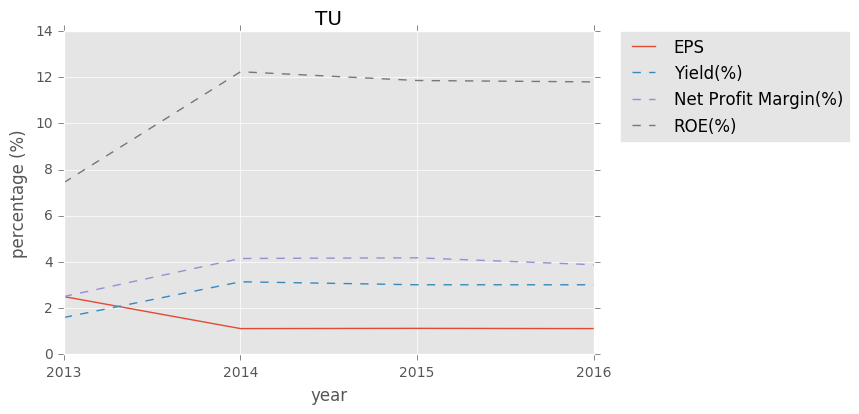

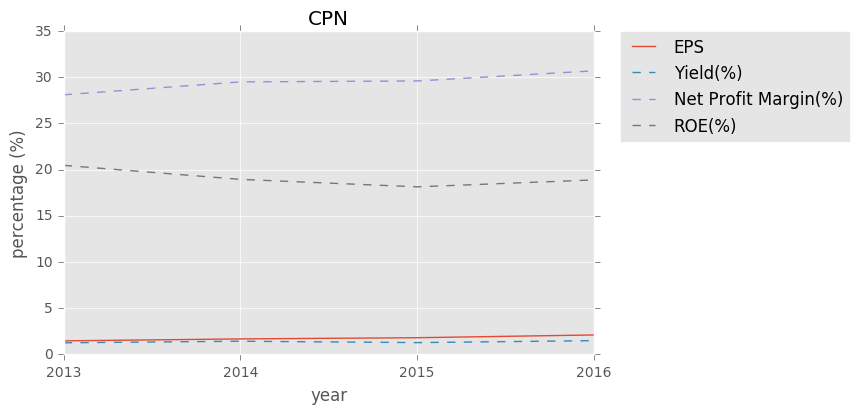

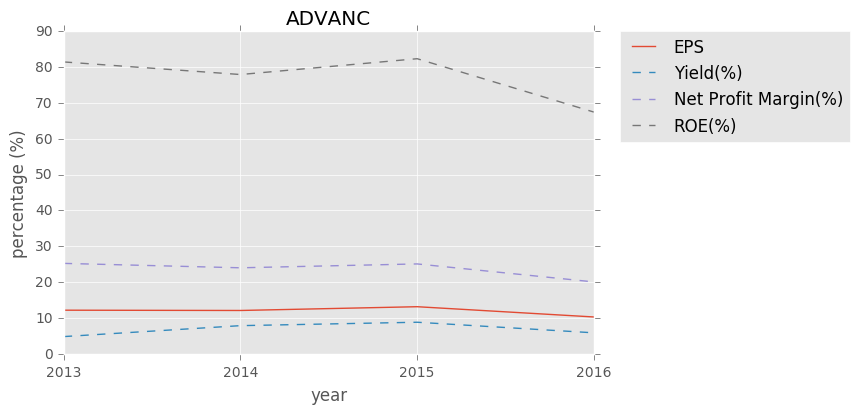

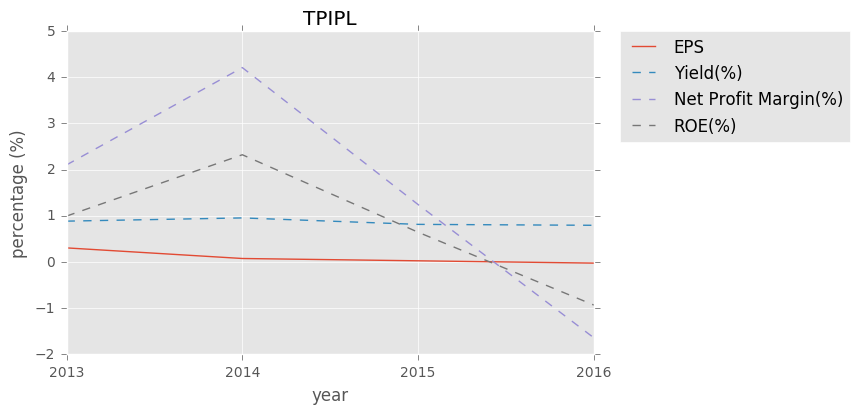

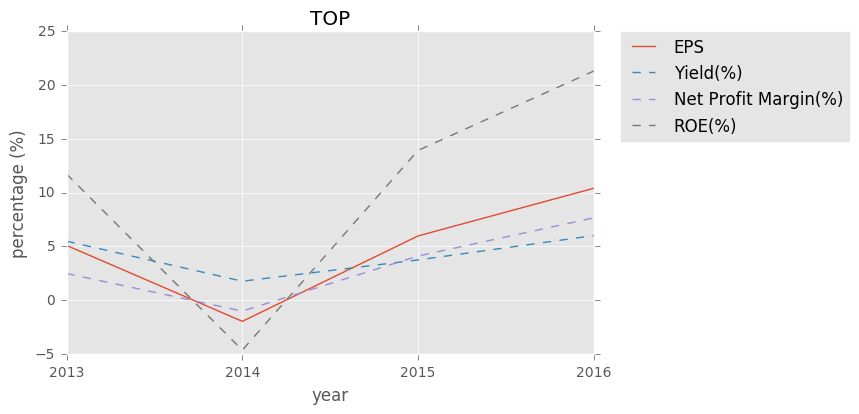

In [8]:
def plotGraph(quote):
    array=[]
    sorted_yield = sorted(setDf[quote][0].items())
    sorted_eps = sorted(setDf[quote][1].items())
    sorted_pe = sorted(setDf[quote][2].items())
    sorted_npm = sorted(setDf[quote][3].items())
    sorted_roe = sorted(setDf[quote][4].items())

    year,dvd = zip(*sorted_yield)
    year,eps = zip(*sorted_eps)
    year,pe = zip(*sorted_pe)
    year,npm = zip(*sorted_npm)
    year,roe = zip(*sorted_roe)
    
    plt.title(quote)
    plt.plot(eps,label='EPS')
    plt.plot(dvd,'--',label='Yield(%)')
    plt.plot(npm,'--',label='Net Profit Margin(%)')
    plt.plot(roe,'--',label='ROE(%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.xticks([0,1,2,3],year)
    plt.ylabel('percentage (%)')
    plt.xlabel('year')
    plt.show()
        
for index,i in enumerate(SET50):
    if index < 5:
        plotGraph(i)

In [9]:
def stock_df_generator(quote):
    yield_df = pd.DataFrame(setDf[quote][0].items(), columns=['year','Yield'])
    eps_df = pd.DataFrame(setDf[quote][1].items(), columns=['year','EPS'])
    npm_df = pd.DataFrame(setDf[quote][3].items(), columns=['year','Net Profit Margin'])
    roe_df = pd.DataFrame(setDf[quote][4].items(), columns=['year','ROE'])

    frames = [yield_df,eps_df,npm_df,roe_df]
    stock_df = pd.concat(frames,axis=1)

    _, i = np.unique(stock_df.columns, return_index=True)
    return stock_df.iloc[:, i].set_index('year').sort_index()

stock_df_generator('AOT')

,EPS,Net Profit Margin,ROE,Yield
year,,,,
2013,11.44,36.37,19.32,1.21
2014,8.55,30.73,12.96,1.89
2015,13.11,40.92,18.22,1.72
2016,13.70,37.08,17.03,1.73


In [69]:
def get_correlation(quote):
    sample = stock_df_generator(quote)
    df1=pd.DataFrame( {'s1':np.random.randn(10), 's2':np.random.randn(10) } )

    sample[['EPS','Net Profit Margin','ROE','Yield']] = sample[['EPS','Net Profit Margin','ROE','Yield']].astype(float)

    return sample.corr()

# print get_correlation('AOT')['EPS']

EPS                  1.000000
Net Profit Margin    0.879924
ROE                  0.723071
Yield               -0.187186
Name: EPS, dtype: float64


## Find correlation against EPS

In [77]:
correlation_dict = {}

for i in SET50:
    try:
        correlation = get_correlation(i)
#         print correlation,i
        correlation_dict[i] = {}
        correlation_dict[i]['Net Profit Margin'] = ''
        correlation_dict[i]['ROE'] = ''
        correlation_dict[i]['Yield'] = ''
        correlation_dict[i]['Net Profit Margin'] = correlation['EPS']['Net Profit Margin']
        correlation_dict[i]['ROE'] = correlation['EPS']['ROE']
        correlation_dict[i]['Yield'] = correlation['EPS']['Yield']
    except:
        pass

In [80]:
correlation_df = pd.DataFrame(correlation_dict)
correlation_df

,ADVANC,AOT,BANPU,BBL,BCP,BDMS,BH,BLA,BTS,CENTEL,...,PTTEP,PTTGC,ROBINS,SCB,SCC,TCAP,TMB,TOP,TPIPL,TU
Net Profit Margin,0.934522,0.879924,0.972825,0.958060,0.968033,-0.418731,0.980218,0.958303,0.975457,0.983605,...,0.990727,0.761812,0.981307,0.998897,0.994153,0.986411,0.989017,0.981954,0.440505,-0.984865
ROE,0.959101,0.723071,0.989526,0.946305,0.992859,0.031560,0.052781,0.989508,0.998788,0.995059,...,0.998510,0.998287,0.750146,0.769595,0.762856,0.978024,0.812464,0.995829,0.391337,-0.996534
Yield,0.562596,-0.187186,0.657341,0.270688,0.780818,-0.044864,0.429648,0.915616,-0.369785,0.849818,...,0.526657,0.606493,-0.099501,0.675235,0.649846,0.765235,0.932996,0.896884,0.449334,-0.996771


In [90]:
npm_df = correlation_df.loc['Net Profit Margin',:]
roe_df = correlation_df.loc['ROE',:]
yield_df = correlation_df.loc['Yield',:]

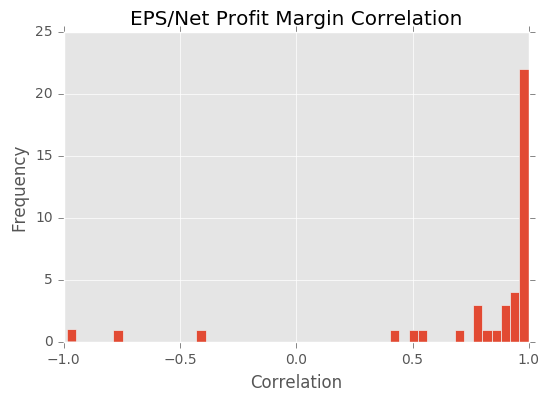

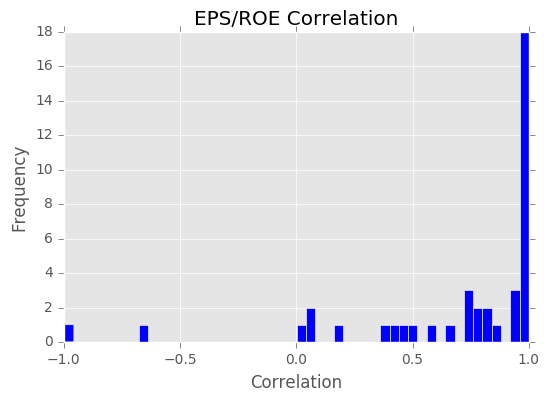

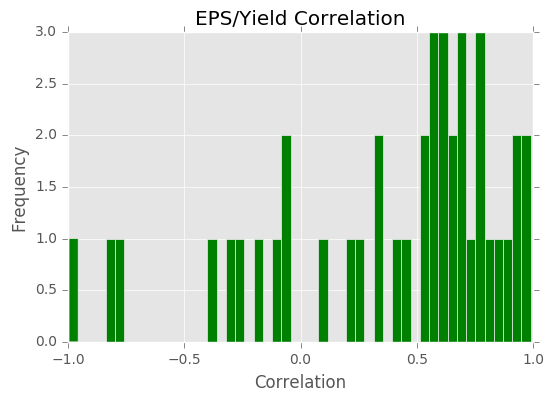

In [132]:
plt.hist(npm_df,bins=50,stacked=False)
plt.title("EPS/Net Profit Margin Correlation")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.show()

plt.hist(roe_df,bins=50,stacked=False,color='blue')
plt.title("EPS/ROE Correlation")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.show()

plt.hist(yield_df,bins=50,stacked=False,color='green')
plt.title("EPS/Yield Correlation")
plt.xlabel("Correlation")
plt.ylabel("Frequency")
plt.show()

In [166]:
bins = np.linspace(-1,1,50)

npm_cluster = np.digitize(npm_df,bins)
roe_cluster = np.digitize(roe_df,bins)
yield_cluster = np.digitize(yield_df,bins)

npm_cluster_dict = {}
for index,i in enumerate(npm_cluster):
    if i in npm_cluster_dict:
        npm_cluster_dict[i] += [npm_df.index[index]]
    else:
        npm_cluster_dict[i] = [npm_df.index[index]]
        
roe_cluster_dict = {}
for index,i in enumerate(roe_cluster):
    if i in roe_cluster_dict:
        roe_cluster_dict[i] += [roe_df.index[index]]
    else:
        roe_cluster_dict[i] = [roe_df.index[index]]
        
yield_cluster_dict = {}
for index,i in enumerate(yield_cluster):
    if i in yield_cluster_dict:
        yield_cluster_dict[i] += [yield_df.index[index]]
    else:
        yield_cluster_dict[i] = [yield_df.index[index]]

In [186]:
print 'Cluster By Net Profit Margin'
print ' '
for i in sorted(npm_cluster_dict):
    print 'Stock at bins:',i
    for j in npm_cluster_dict[i]:
        print '  -',j
    print '________________________'

Cluster By Net Profit Margin
 
Stock at bins: 1
  - TU
________________________
Stock at bins: 6
  - INTUCH
________________________
Stock at bins: 15
  - BDMS
________________________
Stock at bins: 36
  - TPIPL
________________________
Stock at bins: 38
  - CPALL
  - LH
________________________
Stock at bins: 42
  - GLOW
________________________
Stock at bins: 44
  - MINT
  - PTTGC
________________________
Stock at bins: 45
  - DELTA
  - KBANK
________________________
Stock at bins: 46
  - PTT
________________________
Stock at bins: 47
  - AOT
  - EGCO
  - KTB
________________________
Stock at bins: 48
  - ADVANC
  - BBL
  - BLA
  - HMPRO
________________________
Stock at bins: 49
  - BANPU
  - BCP
  - BH
  - BTS
  - CENTEL
  - CK
  - CPF
  - CPN
  - DTAC
  - GLOBAL
  - IRPC
  - IVL
  - KCE
  - KKP
  - PTG
  - PTTEP
  - ROBINS
  - SCB
  - SCC
  - TCAP
  - TMB
  - TOP
________________________


In [187]:
print 'Cluster By ROE'
print ' '
for i in sorted(roe_cluster_dict):
    print 'Stock at bins:',i
    for j in roe_cluster_dict[i]:
        print '  -',j
    print '________________________'

Cluster By ROE
 
Stock at bins: 1
  - TU
________________________
Stock at bins: 9
  - CPN
________________________
Stock at bins: 26
  - BDMS
  - BH
________________________
Stock at bins: 27
  - KCE
________________________
Stock at bins: 30
  - CPALL
________________________
Stock at bins: 35
  - TPIPL
________________________
Stock at bins: 36
  - GLOW
  - INTUCH
________________________
Stock at bins: 37
  - DELTA
________________________
Stock at bins: 39
  - LH
________________________
Stock at bins: 41
  - KBANK
________________________
Stock at bins: 43
  - AOT
  - MINT
  - ROBINS
________________________
Stock at bins: 44
  - SCB
  - SCC
________________________
Stock at bins: 45
  - KTB
  - TMB
________________________
Stock at bins: 46
  - HMPRO
________________________
Stock at bins: 48
  - ADVANC
  - BBL
  - EGCO
________________________
Stock at bins: 49
  - BANPU
  - BCP
  - BLA
  - BTS
  - CENTEL
  - CK
  - CPF
  - DTAC
  - GLOBAL
  - IRPC
  - IVL
  - KKP
  - PTG
  - P

In [188]:
print 'Cluster By Dividend Yield'
print ' '
for i in sorted(yield_cluster_dict):
    print 'Stock at bins:',i
    for j in yield_cluster_dict[i]:
        print '  -',j
    print '________________________'

Cluster By Dividend Yield
 
Stock at bins: 1
  - TU
________________________
Stock at bins: 5
  - CK
________________________
Stock at bins: 6
  - CPALL
________________________
Stock at bins: 16
  - BTS
________________________
Stock at bins: 17
  - PTG
________________________
Stock at bins: 18
  - HMPRO
________________________
Stock at bins: 20
  - AOT
________________________
Stock at bins: 23
  - ROBINS
________________________
Stock at bins: 24
  - BDMS
  - KCE
________________________
Stock at bins: 27
  - KTB
________________________
Stock at bins: 31
  - MINT
________________________
Stock at bins: 32
  - BBL
________________________
Stock at bins: 33
  - DELTA
  - EGCO
________________________
Stock at bins: 36
  - BH
  - TPIPL
________________________
Stock at bins: 38
  - GLOW
  - PTTEP
________________________
Stock at bins: 39
  - ADVANC
  - IVL
  - KBANK
________________________
Stock at bins: 40
  - CPF
  - DTAC
  - PTTGC
________________________
Stock at bins: 41
  - 

## Graveyard

In [181]:
stockname = []
y2013ROE = []
y2014ROE = []
y2015ROE = []
y2016ROE = []
y2013Dividend_Yield = []
y2014Dividend_Yield = []
y2015Dividend_Yield = []
y2016Dividend_Yield = []
y2013ProfitMargin = []
y2014ProfitMargin = []
y2015ProfitMargin = []
y2016ProfitMargin = []
y2013EPS = []
y2014EPS = []
y2015EPS = []
y2016EPS = []

for i in SET50:
    stockname.append(i)
    y2013ROE.append(SET50[i]["ROE"]['2013'])
    y2014ROE.append(SET50[i]["ROE"]['2014'])
    y2015ROE.append(SET50[i]["ROE"]['2015'])
    y2016ROE.append(SET50[i]["ROE"]['2016'])
    d1 = SET50[i]["Dividend_Yield"]['2013']
    d2 = SET50[i]["Dividend_Yield"]['2014']
    d3 = SET50[i]["Dividend_Yield"]['2015']
    d4 = SET50[i]["Dividend_Yield"]['2016']
    if d1 == 'N/A':
        y2013Dividend_Yield.append(0)
    else:
        y2013Dividend_Yield.append(SET50[i]["Dividend_Yield"]['2013'])
    if d2 == 'N/A':
        y2014Dividend_Yield.append(0)
    else:
        y2014Dividend_Yield.append(SET50[i]["Dividend_Yield"]['2014'])
    if d3 == 'N/A':
        y2015Dividend_Yield.append(0)
    else:
        y2015Dividend_Yield.append(SET50[i]["Dividend_Yield"]['2015'])
    if d4 == 'N/A':
        y2016Dividend_Yield.append(0)
    else:
        y2016Dividend_Yield.append(SET50[i]["Dividend_Yield"]['2016'])
    y2013ProfitMargin.append(SET50[i]["ProfitMargin"]['2013'])
    y2014ProfitMargin.append(SET50[i]["ProfitMargin"]['2014'])
    y2015ProfitMargin.append(SET50[i]["ProfitMargin"]['2015'])
    y2016ProfitMargin.append(SET50[i]["ProfitMargin"]['2016'])
    y2013EPS.append(SET50[i]["EPS"]['2013'])
    y2014EPS.append(SET50[i]["EPS"]['2014'])
    y2015EPS.append(SET50[i]["EPS"]['2015'])
    y2016EPS.append(SET50[i]["EPS"]['2016'])

allStockROE = []
allStockEPS = []
allStockYield = []

y2013ROE = map(float, y2013ROE)
y2014ROE = map(float, y2014ROE)
y2015ROE = map(float, y2015ROE)
y2016ROE = map(float, y2016ROE)

y2013EPS = map(float, y2013EPS)
y2014EPS = map(float, y2014EPS)
y2015EPS = map(float, y2015EPS)
y2016EPS = map(float, y2016EPS)

y2013Dividend_Yield = map(float, y2013Dividend_Yield)
y2014Dividend_Yield = map(float, y2014Dividend_Yield)
y2015Dividend_Yield = map(float, y2015Dividend_Yield)
y2016Dividend_Yield = map(float, y2016Dividend_Yield)

for i in range(len(stockname)):
    allStockROE.append([y2013ROE[i],y2014ROE[i],y2015ROE[i],y2016ROE[i]])
    allStockEPS.append([y2013EPS[i],y2014EPS[i],y2015EPS[i],y2016EPS[i]])
    allStockYield.append([y2013Dividend_Yield[i],y2014Dividend_Yield[i],y2015Dividend_Yield[i],y2016Dividend_Yield[i]])

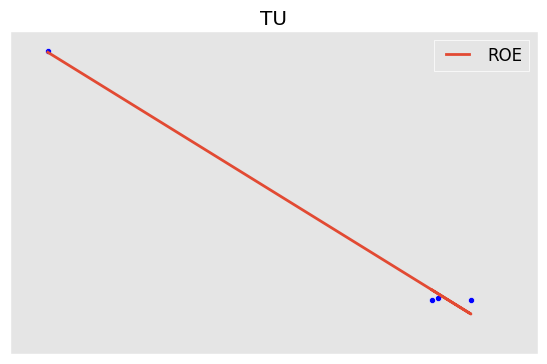

('Coefficients:', array([[-0.30348797]]))
Mean squared error: 0.00
Variance score: 0.99


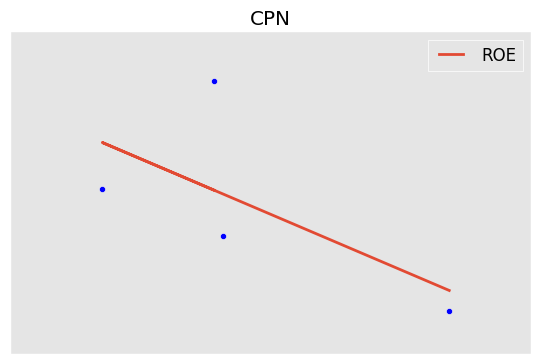

('Coefficients:', array([[-0.17705688]]))
Mean squared error: 0.03
Variance score: 0.42


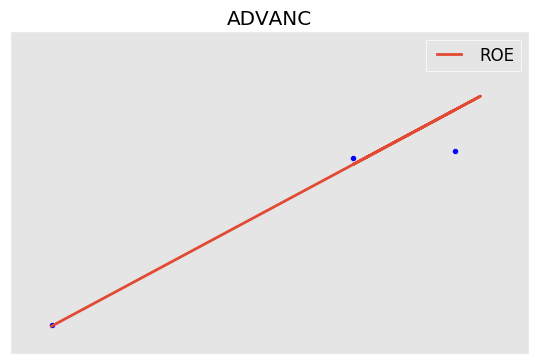

('Coefficients:', array([[ 0.16762963]]))
Mean squared error: 0.09
Variance score: 0.92


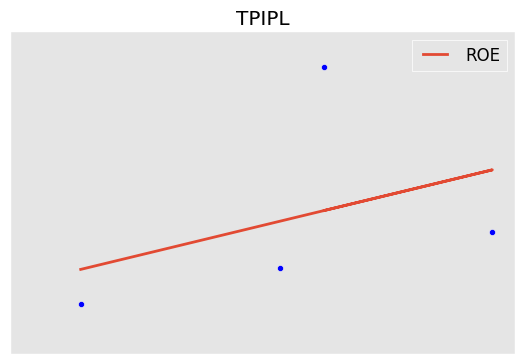

('Coefficients:', array([[ 0.04257352]]))
Mean squared error: 0.01
Variance score: 0.15


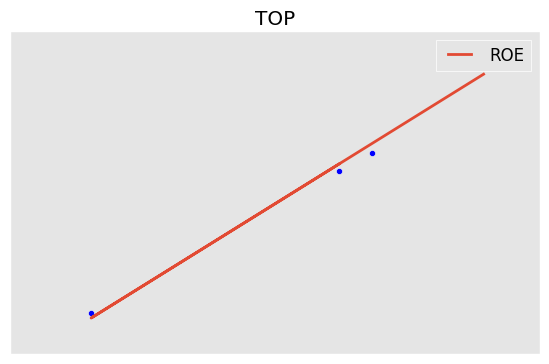

('Coefficients:', array([[ 0.46601962]]))
Mean squared error: 0.16
Variance score: 0.99


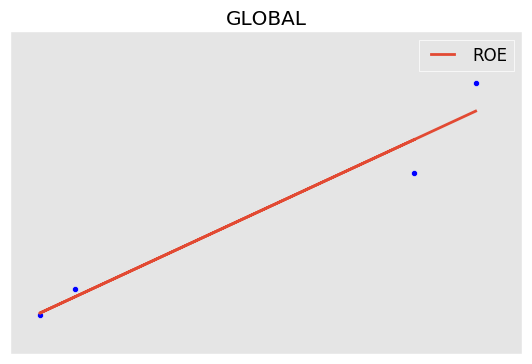

('Coefficients:', array([[ 0.0408619]]))
Mean squared error: 0.00
Variance score: 0.94


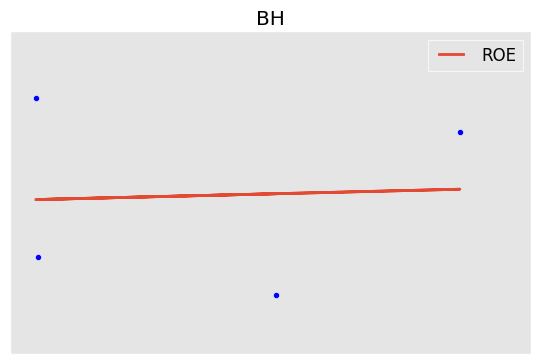

('Coefficients:', array([[ 0.032875]]))
Mean squared error: 0.41
Variance score: 0.00


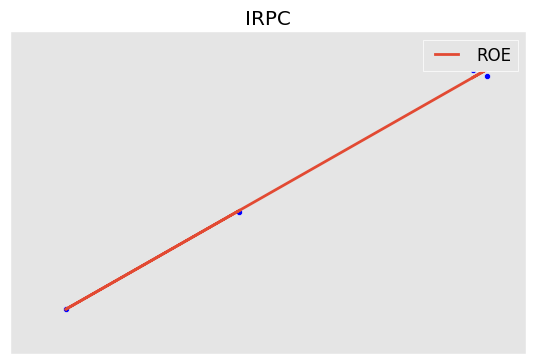

('Coefficients:', array([[ 0.03641625]]))
Mean squared error: 0.00
Variance score: 1.00


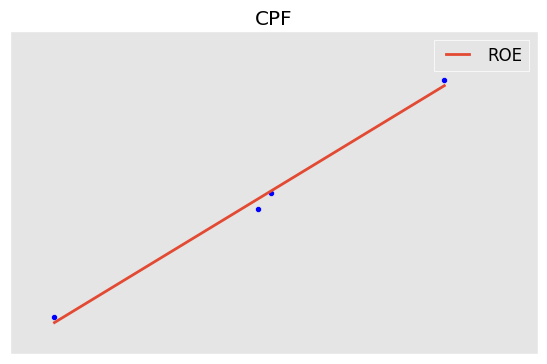

('Coefficients:', array([[ 0.19871226]]))
Mean squared error: 0.00
Variance score: 0.99


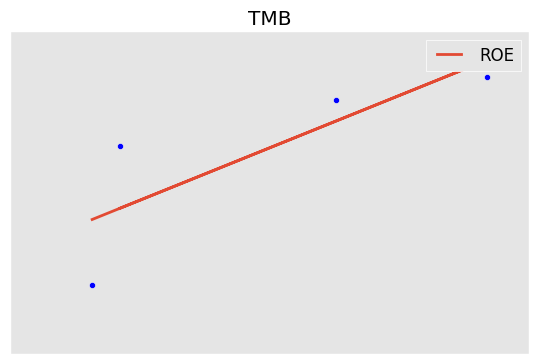

('Coefficients:', array([[ 0.01514698]]))
Mean squared error: 0.00
Variance score: 0.66


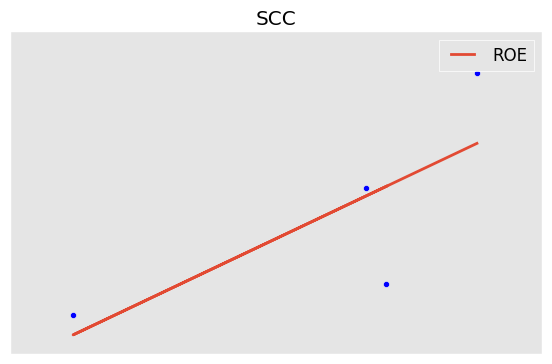

('Coefficients:', array([[ 2.79319517]]))
Mean squared error: 22.28
Variance score: 0.58


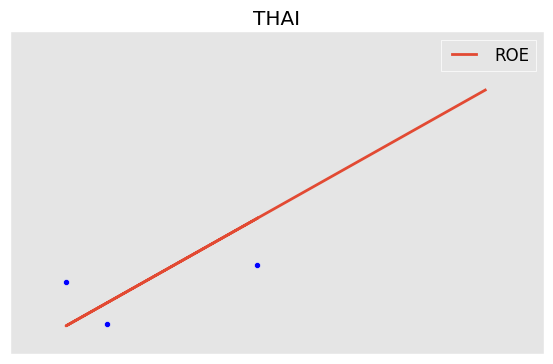

('Coefficients:', array([[ 0.18611178]]))
Mean squared error: 0.99
Variance score: 0.87


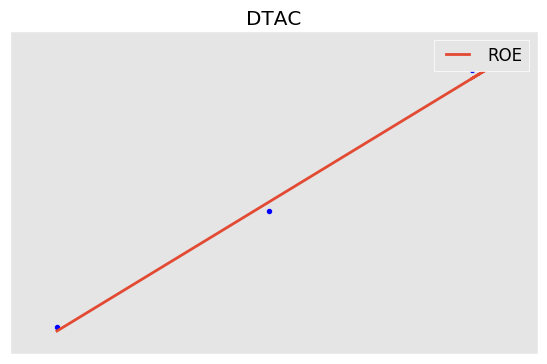

('Coefficients:', array([[ 0.14926211]]))
Mean squared error: 0.01
Variance score: 1.00


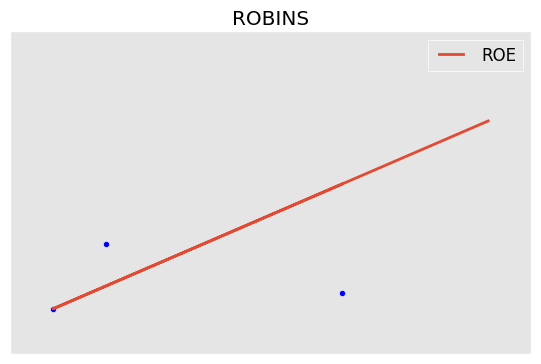

('Coefficients:', array([[ 0.17426066]]))
Mean squared error: 0.04
Variance score: 0.56


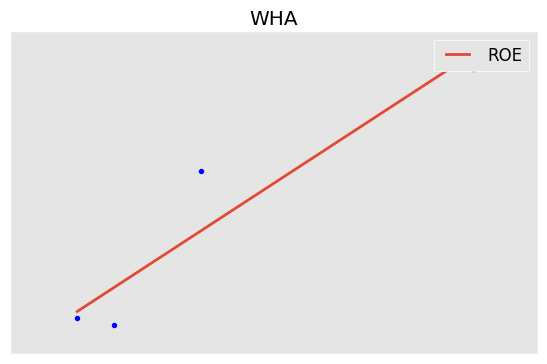

('Coefficients:', array([[ 0.0548147]]))
Mean squared error: 0.04
Variance score: 0.89


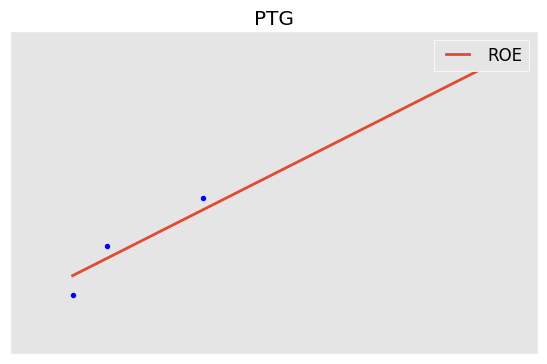

('Coefficients:', array([[ 0.03541798]]))
Mean squared error: 0.00
Variance score: 0.98


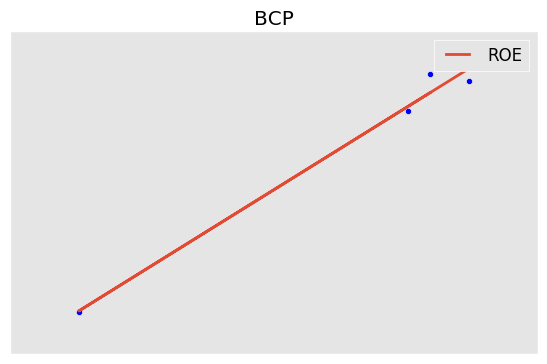

('Coefficients:', array([[ 0.25403517]]))
Mean squared error: 0.02
Variance score: 0.99


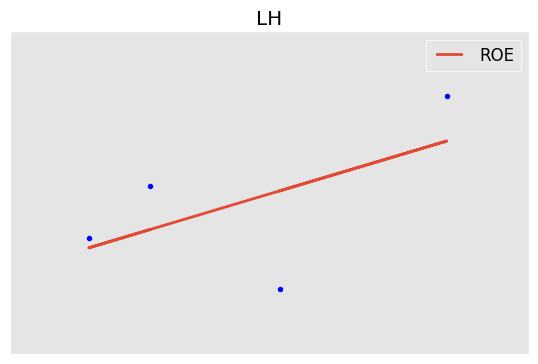

('Coefficients:', array([[ 0.01999126]]))
Mean squared error: 0.00
Variance score: 0.33


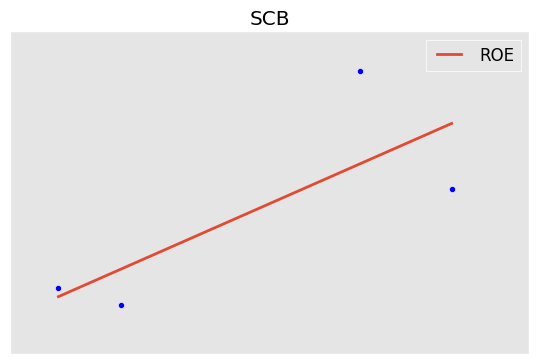

('Coefficients:', array([[ 0.19672763]]))
Mean squared error: 0.21
Variance score: 0.59


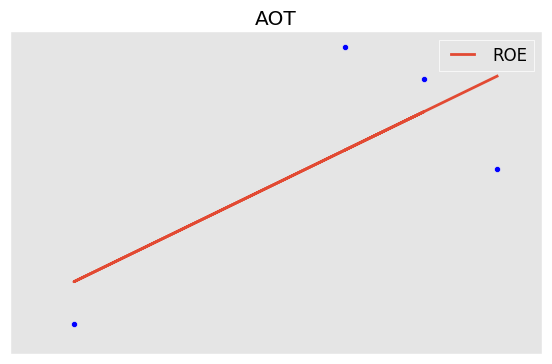

('Coefficients:', array([[ 0.60087108]]))
Mean squared error: 1.91
Variance score: 0.52


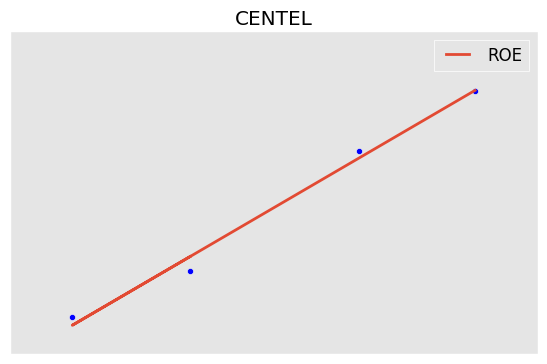

('Coefficients:', array([[ 0.06676055]]))
Mean squared error: 0.00
Variance score: 0.99


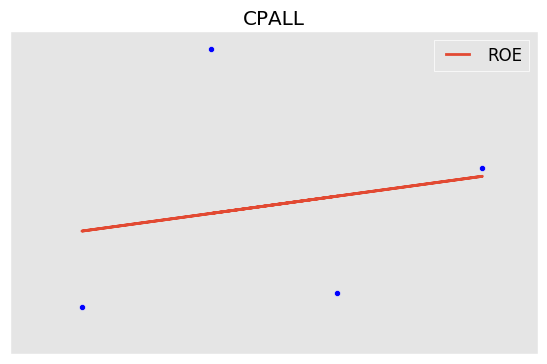

('Coefficients:', array([[ 0.0251784]]))
Mean squared error: 0.08
Variance score: 0.04


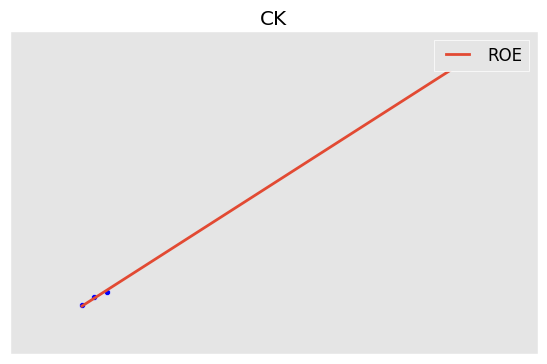

('Coefficients:', array([[ 0.06728968]]))
Mean squared error: 0.00
Variance score: 1.00


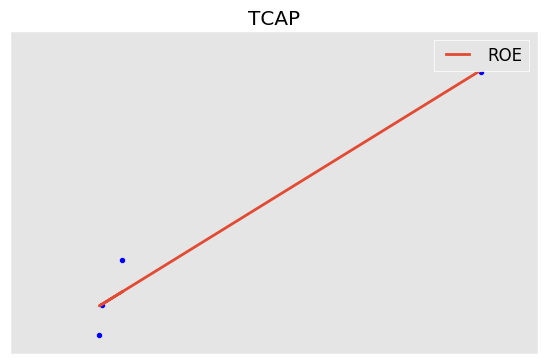

('Coefficients:', array([[ 0.28857588]]))
Mean squared error: 0.07
Variance score: 0.96


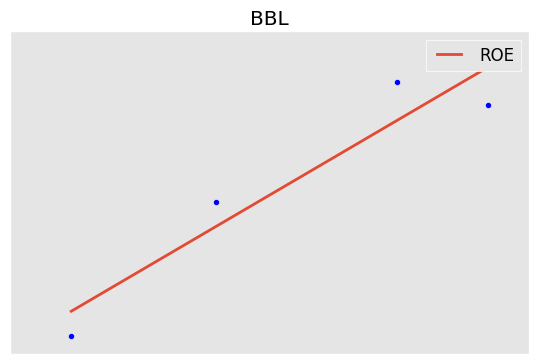

('Coefficients:', array([[ 0.5650353]]))
Mean squared error: 0.09
Variance score: 0.90


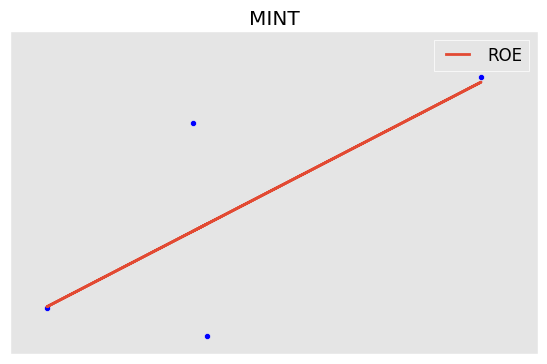

('Coefficients:', array([[ 0.07403339]]))
Mean squared error: 0.03
Variance score: 0.52


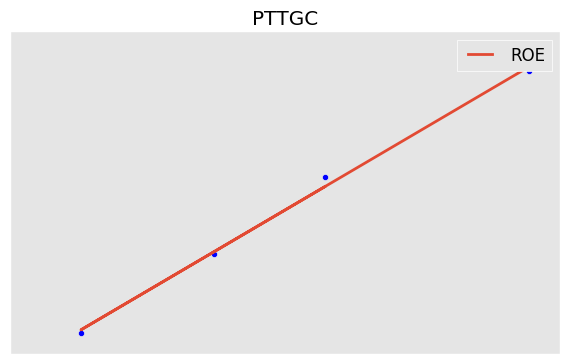

('Coefficients:', array([[ 0.50026084]]))
Mean squared error: 0.01
Variance score: 1.00


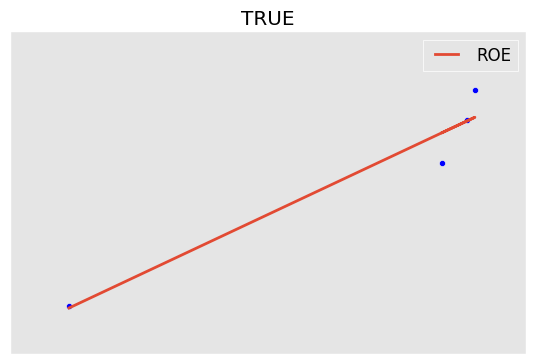

('Coefficients:', array([[ 0.00644143]]))
Mean squared error: 0.01
Variance score: 0.94


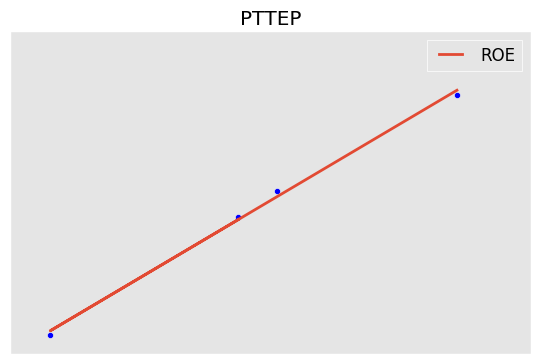

('Coefficients:', array([[ 0.95413032]]))
Mean squared error: 0.19
Variance score: 1.00


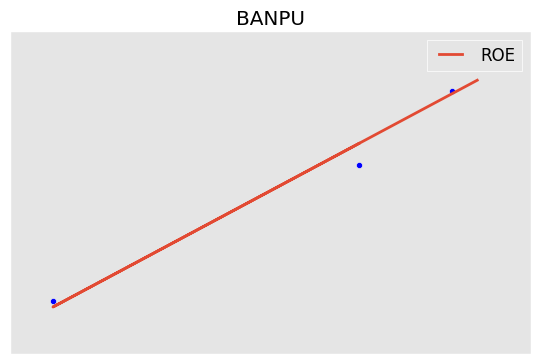

('Coefficients:', array([[ 0.26940096]]))
Mean squared error: 0.01
Variance score: 0.98


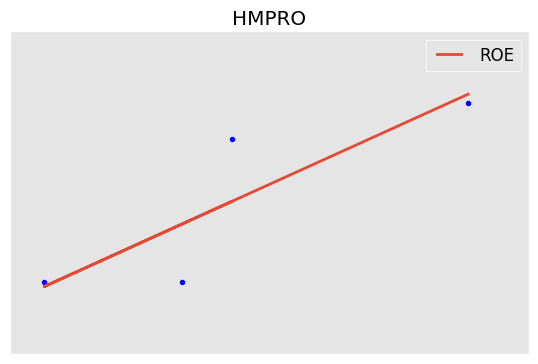

('Coefficients:', array([[ 0.00938131]]))
Mean squared error: 0.00
Variance score: 0.72


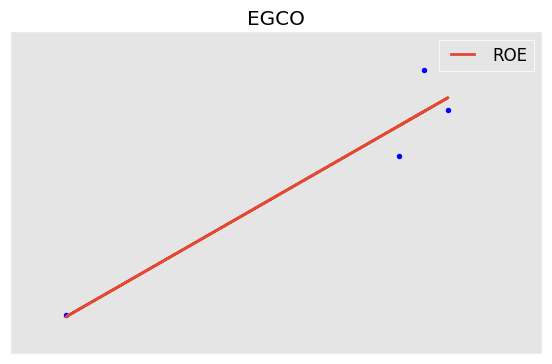

('Coefficients:', array([[ 1.35116212]]))
Mean squared error: 0.68
Variance score: 0.92


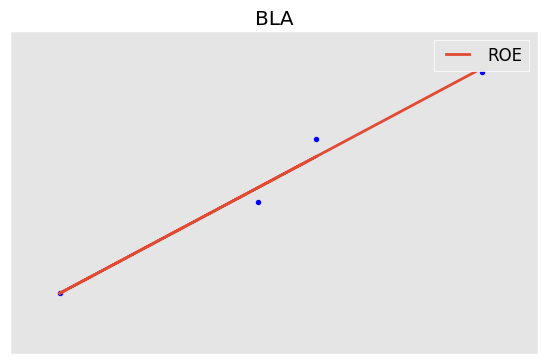

('Coefficients:', array([[ 0.21789244]]))
Mean squared error: 0.01
Variance score: 0.98


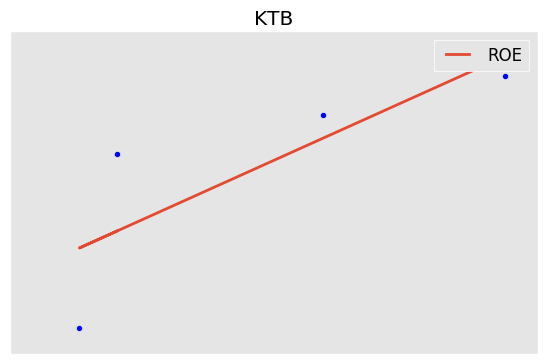

('Coefficients:', array([[ 0.05264131]]))
Mean squared error: 0.01
Variance score: 0.64


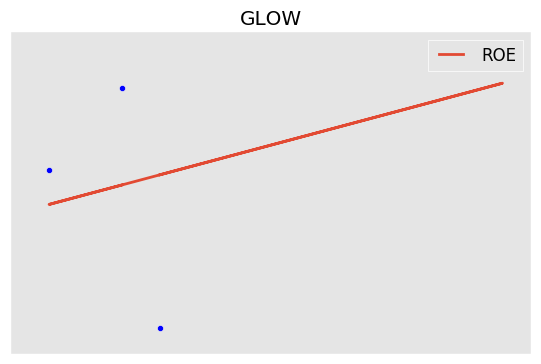

('Coefficients:', array([[ 0.17269712]]))
Mean squared error: 0.21
Variance score: 0.20


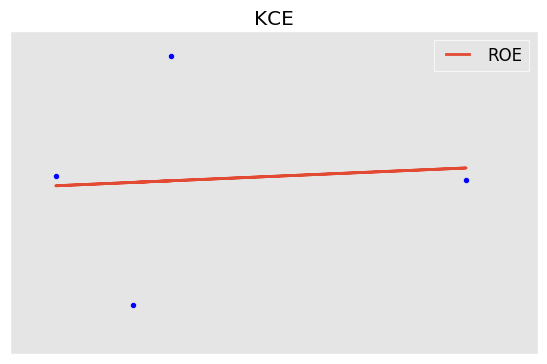

('Coefficients:', array([[ 0.02069106]]))
Mean squared error: 0.91
Variance score: 0.01


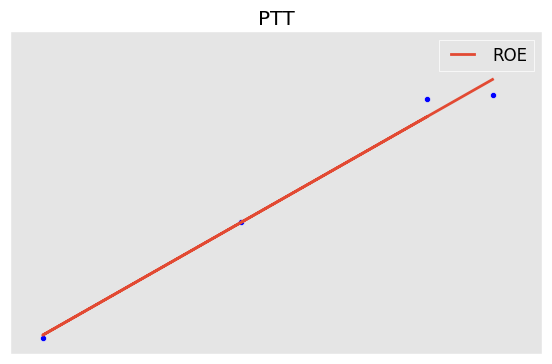

('Coefficients:', array([[ 2.34353135]]))
Mean squared error: 1.71
Variance score: 0.99


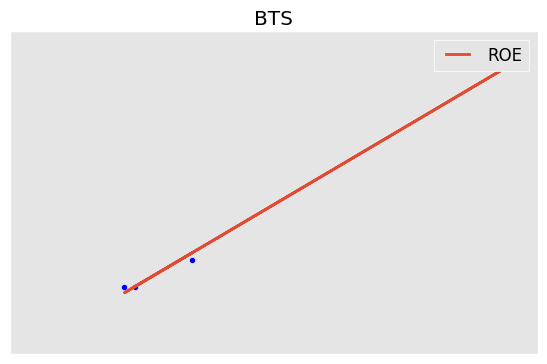

('Coefficients:', array([[ 0.04632985]]))
Mean squared error: 0.00
Variance score: 1.00


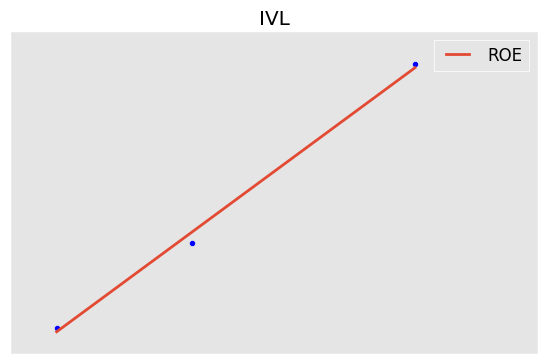

('Coefficients:', array([[ 0.16869338]]))
Mean squared error: 0.01
Variance score: 1.00


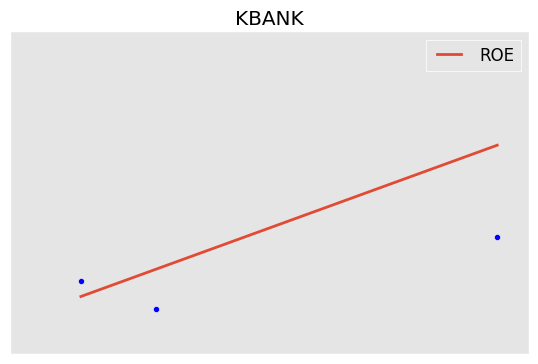

('Coefficients:', array([[ 0.2272263]]))
Mean squared error: 0.70
Variance score: 0.41


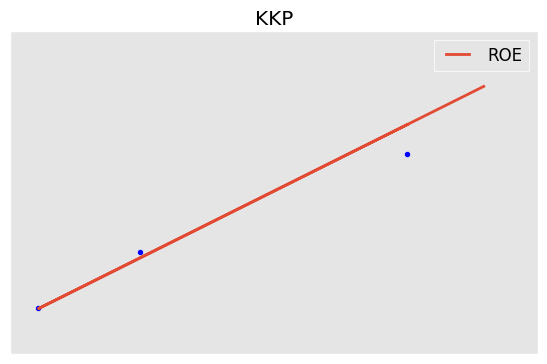

('Coefficients:', array([[ 0.45899557]]))
Mean squared error: 0.07
Variance score: 0.96


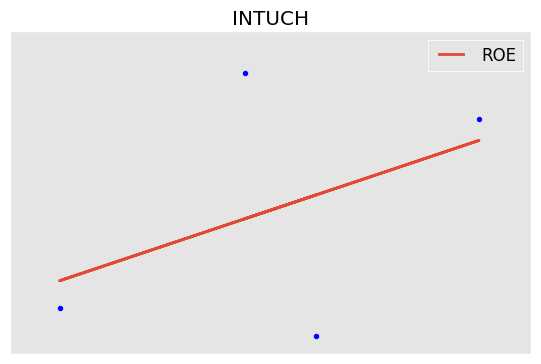

('Coefficients:', array([[ 0.0945313]]))
Mean squared error: 0.05
Variance score: 0.19


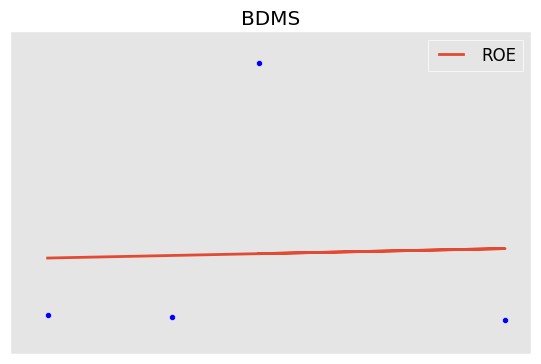

('Coefficients:', array([[ 0.08367606]]))
Mean squared error: 2.35
Variance score: 0.00


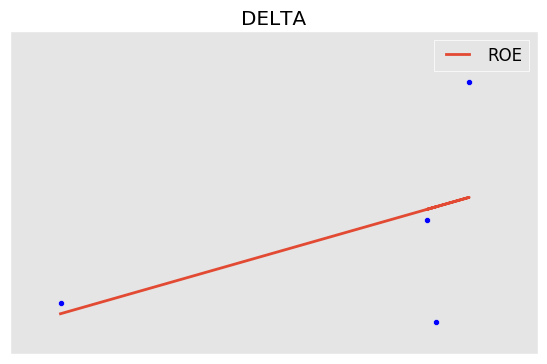

('Coefficients:', array([[ 0.09314845]]))
Mean squared error: 0.13
Variance score: 0.25


In [183]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

for i in range(len(allStockROE)):
    test1 = allStockROE[i]
    test2 = allStockEPS[i]

    test1 = np.reshape(test1,(4,1))
    test2 = np.reshape(test2,(4,1))
    # Split the data into training/testing sets
    ROE_train = test1
    ROE_test = test1

    # Split the targets into training/testing sets
    EPS_train = test2
    EPS_test = test2

    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(ROE_train, EPS_train)

    # Plot outputs
    plt.title(stockname[i])
    plt.scatter(ROE_test, EPS_test)
    plt.plot(ROE_test, regr.predict(ROE_test),
             linewidth=2,label="ROE")
    plt.tight_layout()
    plt.xticks(())
    plt.yticks(())
    plt.legend()
    plt.show()
    # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(ROE_test) - EPS_test) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(ROE_test, EPS_test))
